Coach,
<br>
<br>
<br>
In order to use this code, you will first need to click on the section of code below. Once you have clicked it please click the "Ctrl + Enter" keys at the same time.
<br>
You will then be prompted to enter what you would like to look at. If there is an error in what you type, the code will restart automaticly.
<br>
However, if it does not, simply hit the restart button "  " to relaunch the code. In the top left corner.
<br>
<br>
Once you are finished with this code simply exit out of the code, you will have a PDF with the name you selected in the "Heatmap" Folder of the "Charts" Folder.
<br>
If you have any question or issues, please call me at (256) 479-7457.
<br>
<br>
<br>
Very Respectfully,
<br>
Brett McCracken

What would you like to call the heatmap once it is printed: f
What do you want to look at [Count, Whiff, Exit Velo]: exit velo
What type of Pitch do you want to look at [All, ChangeUp, Curveball, Fastball, Sinker, Slider]: all


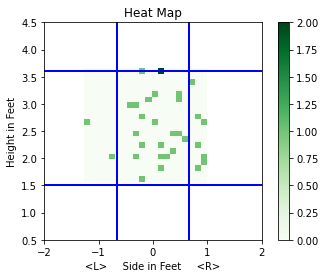

He threw 189 total pitches, with an average exit velo of 79.37.


In [14]:
# ---------- Import Moduals ----------
import os
import csv
import datetime
import shutil
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import smtplib

# ---------- Import CSV ----------
file = 'Raw.csv'
df = pd.read_csv(file)

# ---------- Clean CSV ----------
df_heatmap = df.replace(np.nan, 0)

# ---------- Interface  ----------
# inputs
Name = input('What would you like to call the heatmap once it is printed:')
Question = input('What do you want to look at [Count, Whiff, Exit Velo]:')
Pitch = input('What type of Pitch do you want to look at [All, ChangeUp, Curveball, Fastball, Sinker, Slider]:')
print('\n')

# logic
count = 0
while count < 1000:
    #if count
    if Question.lower() == 'count':
        if Pitch.lower() == "all":
            num_of_tot_pitches = len(df_heatmap)
            print_statment = 'He threw ' + str(num_of_tot_pitches) + ' total pitches.'
            count += 1001
        else:
            num_of_tot_pitches = len(df_heatmap)
            df_heatmap = df_heatmap[df_heatmap['TaggedPitchType'].str.contains(Pitch.capitalize())]
            num_of_pitches = len(df_heatmap)
            print_statment = 'He threw ' + str(num_of_tot_pitches) + ' of pitches, ' + str(num_of_pitches) + ' were ' + Pitch + ' (' + str("{:.2%}".format(num_of_pitches/num_of_tot_pitches)) + ').'
            count += 1001
       
    # if whiff
    elif Question.lower() == 'whiff':
        if Pitch.lower() == "all":
            num_of_tot_pitches = len(df_heatmap)
            df_heatmap = df_heatmap[df_heatmap['PitchCall'].str.contains('StrikeSwinging')]
            num_of_whiff = len(df_heatmap)
            print_statment = 'He threw ' + str(num_of_tot_pitches)  + ' total pitches, ' + str(num_of_whiff) + ' were whiffed on' + ' (' + str("{:.2%}".format(num_of_whiff/num_of_tot_pitches)) + ').'
            count += 1001
        else:
            df_heatmap = df_heatmap[df_heatmap['TaggedPitchType'].str.contains(Pitch.capitalize())]
            num_of_pitches = len(df_heatmap)
            df_heatmap = df_heatmap[df_heatmap['PitchCall'].str.contains('StrikeSwinging')]
            num_of_whiff = len(df_heatmap)
            print_statment = 'He threw ' + str(num_of_pitches) + ' ' + Pitch + ' pitches, ' + str(num_of_whiff) + ' were whiffed on' + ' (' + str("{:.2%}".format(num_of_whiff/num_of_pitches)) + ').'
            count += 1001
            
    # if Exit Velo
    elif Question.lower() == 'exit velo':
        if Pitch.lower() == 'all':
            num_of_tot_pitches = len(df_heatmap)
            df_heatmap = df_heatmap[df_heatmap.ExitSpeed > 0]
            exit_speed = "{:.2f}".format(df_heatmap['ExitSpeed'].mean())
            print_statment = 'He threw ' + str(num_of_tot_pitches) + ' total pitches, with an average exit velo of ' + str(exit_speed) + '.'
            count += 1001
        else:
            df_heatmap = df_heatmap[df_heatmap['TaggedPitchType'].str.contains(Pitch.capitalize())]
            num_of_pitches = len(df_heatmap)
            df_heatmap = df_heatmap[df_heatmap.ExitSpeed > 0]
            num_of_hits = len(df_heatmap) 
            exit_speed = "{:.2f}".format(df_heatmap['ExitSpeed'].mean())
            print_statment = 'He threw ' + str(num_of_pitches) + ' ' + Pitch + ' pitches, ' + str(num_of_hits) + ' were hit' + ' (' + str("{:.2%}".format(num_of_hits/num_of_pitches)) + ') with an average exit velo of ' + exit_speed + '.'
            count += 1001
            
    else:
        print("-------------------------------------------")
        print("There was an error, resarting now...")
        Name = input('What would you like to call the heatmap once it is printed:')
        Question = input('What do you want to look at [Count, Whiff, Exit Velo]:')
        Pitch = input('What type of Pitch do you want to look at [All, 2-Fastball, 4-Fastball, Curveball, Slider, ChangeUp]:')
        print('\n')
        count += 1       
            
# ---------- Plotting  ----------
# Set x and y coordinates
y = df_heatmap['PlateLocHeight']
x = df_heatmap['PlateLocSide']

# Plot
heatmap, xedges, yedges = np.histogram2d(x, y, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap = 'Greens')
plt.colorbar()

#Lables
plt.title('Heat Map')
plt.xlabel('<L>     Side in Feet     <R>')
plt.ylabel('Height in Feet')

# Chart dimensions
plt.xlim([-2, 2])
plt.ylim([0.5, 4.5]) 

# Creates Strikezone lines
plt.axhline(y=1.5, linewidth=2, color='b')
plt.axhline(y=3.6, linewidth=2, color='b')
plt.axvline(x=(2/3), linewidth=2, color='b')
plt.axvline(x=(-2/3), linewidth=2, color='b')

# Saves as fig
#plt.savefig('Charts\\Heatmaps\\' + Name)

# Show
plt.show()
print(print_statment)